In [52]:
import time 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import warnings
warnings.filterwarnings('ignore')


In [54]:
df=pd.read_csv('predictive_maintenance.csv')

Target variable distribution


In [55]:

df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

Hot encoding data

In [56]:

from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
encoded_results = labelbinarizer.fit_transform(df["Failure Type"])

In [57]:
encoded_results

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [58]:
df_encoded = pd.DataFrame(encoded_results,columns=labelbinarizer.classes_)

In [59]:
encoded_results2 = labelbinarizer.fit_transform(df["Type"])

In [60]:
df_encoded2 = pd.DataFrame(encoded_results2,columns=labelbinarizer.classes_)

reattaching the featurs

In [61]:
encoded_df = pd.concat([df,df_encoded, df_encoded2], axis=1)

In [62]:
encoded_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,0,1,0,0,0,0,0,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0,0,0,0,0,1,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0,0,0,0,0,1,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0,0,0,0,0,1,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,0,1,0,0,0,0,0,0,1
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,0,1,0,0,0,0,1,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,0,1,0,0,0,0,0,0,1
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,0,1,0,0,0,0,1,0,0


dropping unecessary columns

In [63]:

encoded_df.drop(['Product ID',"UDI","Type","Failure Type"], axis=1, inplace=True)

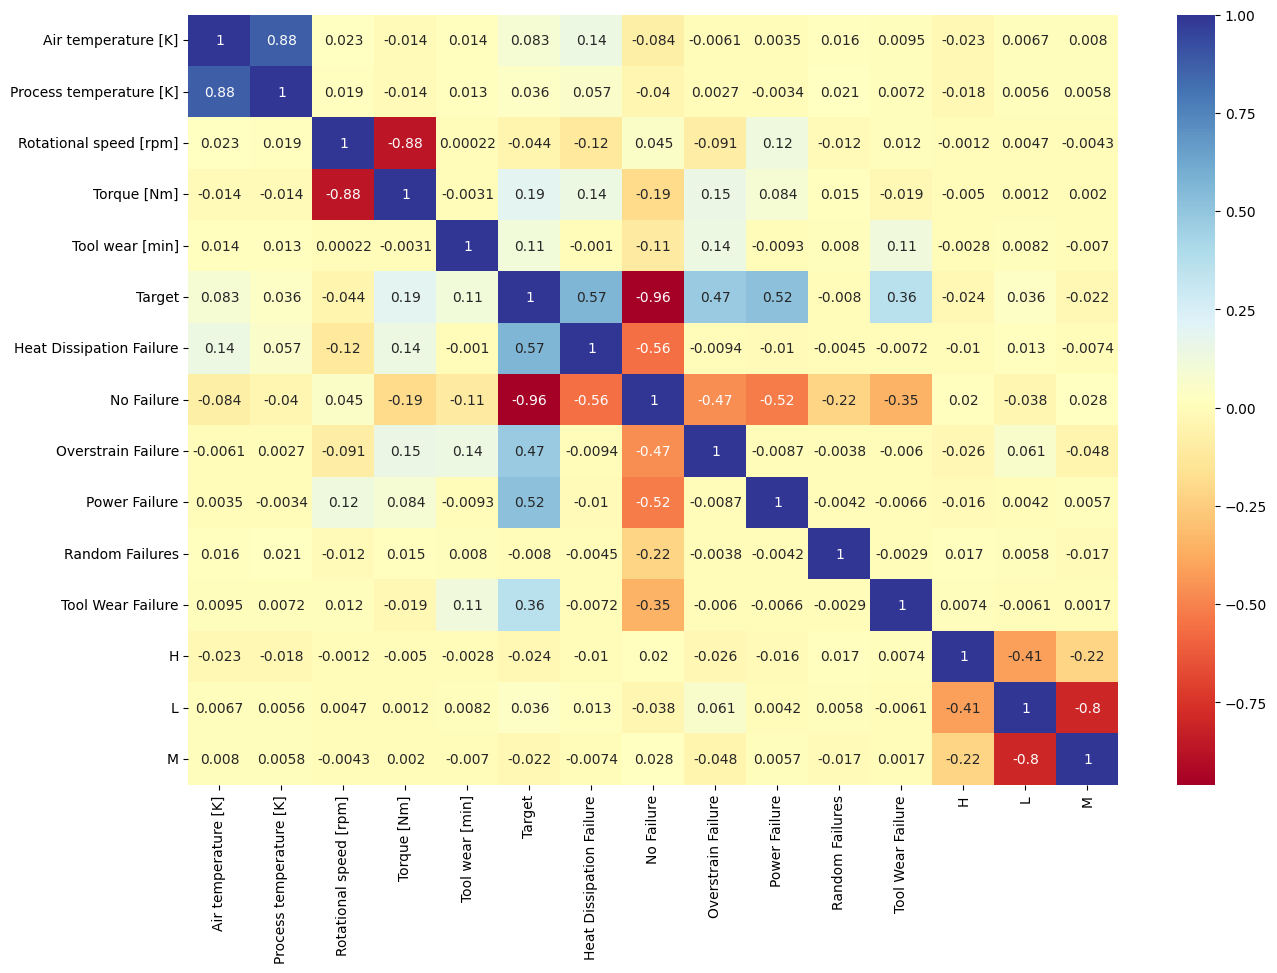

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(encoded_df.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

Checking null and duplicates

In [65]:
null = encoded_df.isnull().sum()
dup = encoded_df.duplicated().sum()
null,dup

(Air temperature [K]         0
 Process temperature [K]     0
 Rotational speed [rpm]      0
 Torque [Nm]                 0
 Tool wear [min]             0
 Target                      0
 Heat Dissipation Failure    0
 No Failure                  0
 Overstrain Failure          0
 Power Failure               0
 Random Failures             0
 Tool Wear Failure           0
 H                           0
 L                           0
 M                           0
 dtype: int64,
 0)

Creating a Data frame with the desired features

In [66]:
df = encoded_df[['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]','H','L','M','Target','No Failure','Heat Dissipation Failure','Overstrain Failure','Power Failure','Tool Wear Failure',
 'Random Failures']]

In [67]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0


In [68]:
df.shape
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0


scaling the featurs

In [69]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]']]
scaler = StandardScaler()
scaled = scaler.fit_transform(columns_to_scale)



making x and y

In [82]:
y  = df.iloc[:,8:]
x = df.iloc[:, 0:8]
display(x)
display(y)
x.columns

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1
9996,298.9,308.4,1632,31.8,17,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1
9998,299.0,308.7,1408,48.5,25,1,0,0


,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0
9996,0,1,0,0,0,0,0
9997,0,1,0,0,0,0,0
9998,0,1,0,0,0,0,0


Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'H', 'L',
       'M'],
      dtype='object')

a function to ensure correct format for column names

In [71]:
def clean_column_names(df):
    df.columns = [col.replace('{', '_').replace('}', '_').replace('[', '_').replace(']', '_')
                  .replace('<', '_').replace('>', '_').replace(':', '_').replace(',', '_')
                  .replace(' ', '_').replace('-', '_') for col in df.columns]
    return df

train , test split

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,  # Features
    y,  # Labels
    test_size=0.2,  # 20% of the data for testing
    random_state=42,  # Seed for reproducibility
    stratify=y  # Stratify split by the labels to maintain distribution
)
x_train = clean_column_names(x_train)
x_test = clean_column_names(x_test)

targets distributions

In [73]:

from collections import Counter
# Display initial class distribution for each label in the training data
for column in y_train.columns:
    print(f"Class distribution for {column}:", Counter(y_train[column]))

Class distribution for Target: Counter({0: 7729, 1: 271})
Class distribution for No Failure: Counter({1: 7722, 0: 278})
Class distribution for Heat Dissipation Failure: Counter({0: 7910, 1: 90})
Class distribution for Overstrain Failure: Counter({0: 7938, 1: 62})
Class distribution for Power Failure: Counter({0: 7924, 1: 76})
Class distribution for Tool Wear Failure: Counter({0: 7964, 1: 36})
Class distribution for Random Failures: Counter({0: 7986, 1: 14})


function for training and evaluating models

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, hamming_loss

from sklearn.metrics import accuracy_score, hamming_loss, f1_score, recall_score, precision_score, multilabel_confusion_matrix


   


Functin for training and evaluating the model


In [76]:
import time
from sklearn.metrics import accuracy_score, hamming_loss, f1_score, recall_score, precision_score, multilabel_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    testing_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    ham_loss = hamming_loss(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    confusion = multilabel_confusion_matrix(y_test, y_pred)

    return {
        "model_name": model_name,
        "training_time": training_time,
        "testing_time": testing_time,
        "accuracy": accuracy,
        "hamming_loss": ham_loss,
        "f1_score": f1,
        "recall": recall,
        "precision": precision,
        "confusion_matrix": confusion
    }





log_reg = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier(n_estimators=100)
svm_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
gb_model = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
lgbm_model = OneVsRestClassifier(LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss'))


list and loop to train models and store their matrices

In [100]:
results = []
models = [log_reg, dec_tree, rand_forest, svm_model, gb_model, lgbm_model, xgb_model]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Gradient Boosting ML", "LightGBM ML", "XGBoost ML"]

results = [train_and_evaluate_model(model, x_train, y_train, x_test, y_test, name) for model, name in zip(models, model_names)]

display(results)



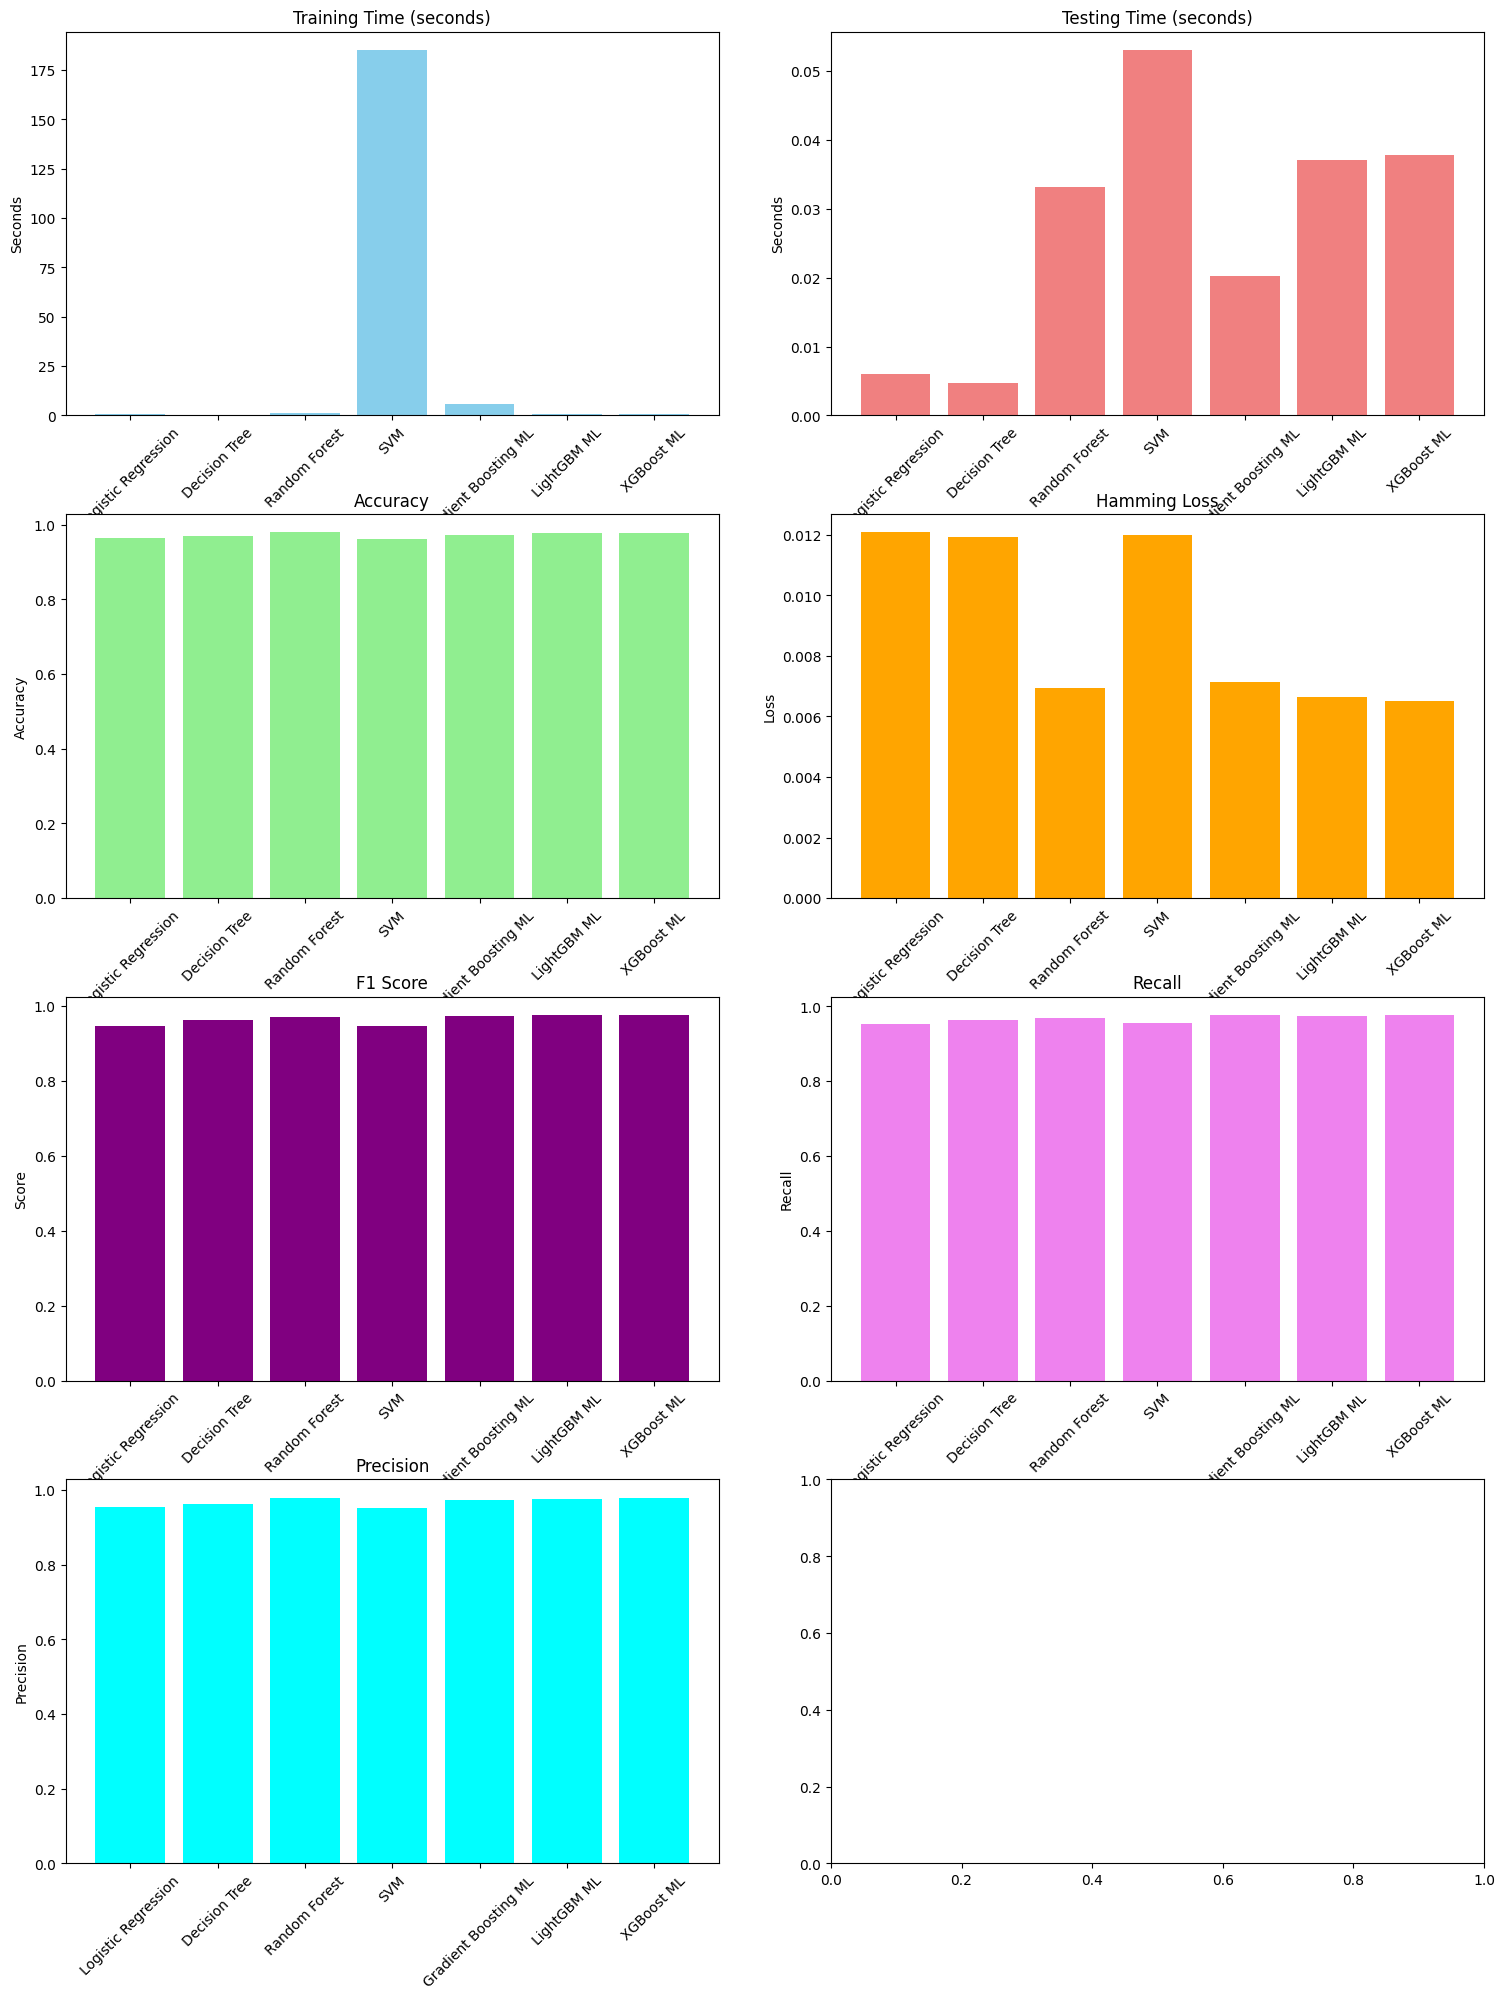

In [78]:
results_df = pd.DataFrame(results)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))  # Adjust as necessary
fig.tight_layout(pad=5.0)

# Training Time Plot
axes[0, 0].bar(results_df['model_name'], results_df['training_time'], color='skyblue')
axes[0, 0].set_title('Training Time (seconds)')
axes[0, 0].set_ylabel('Seconds')
axes[0, 0].set_xticklabels(results_df['model_name'], rotation=45)

# Testing Time Plot
axes[0, 1].bar(results_df['model_name'], results_df['testing_time'], color='lightcoral')
axes[0, 1].set_title('Testing Time (seconds)')
axes[0, 1].set_ylabel('Seconds')
axes[0, 1].set_xticklabels(results_df['model_name'], rotation=45)

# Accuracy Plot
axes[1, 0].bar(results_df['model_name'], results_df['accuracy'], color='lightgreen')
axes[1, 0].set_title('Accuracy')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_xticklabels(results_df['model_name'], rotation=45)

# Hamming Loss Plot
axes[1, 1].bar(results_df['model_name'], results_df['hamming_loss'], color='orange')
axes[1, 1].set_title('Hamming Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].set_xticklabels(results_df['model_name'], rotation=45)

# F1 Score Plot
axes[2, 0].bar(results_df['model_name'], results_df['f1_score'], color='purple')
axes[2, 0].set_title('F1 Score')
axes[2, 0].set_ylabel('Score')
axes[2, 0].set_xticklabels(results_df['model_name'], rotation=45)

# Recall Plot
axes[2, 1].bar(results_df['model_name'], results_df['recall'], color='violet')
axes[2, 1].set_title('Recall')
axes[2, 1].set_ylabel('Recall')
axes[2, 1].set_xticklabels(results_df['model_name'], rotation=45)

# Precision Plot
axes[3, 0].bar(results_df['model_name'], results_df['precision'], color='cyan')
axes[3, 0].set_title('Precision')
axes[3, 0].set_ylabel('Precision')
axes[3, 0].set_xticklabels(results_df['model_name'], rotation=45)

# Adjust layout to prevent overlap
plt.show()

confusion matrix for all labels and models

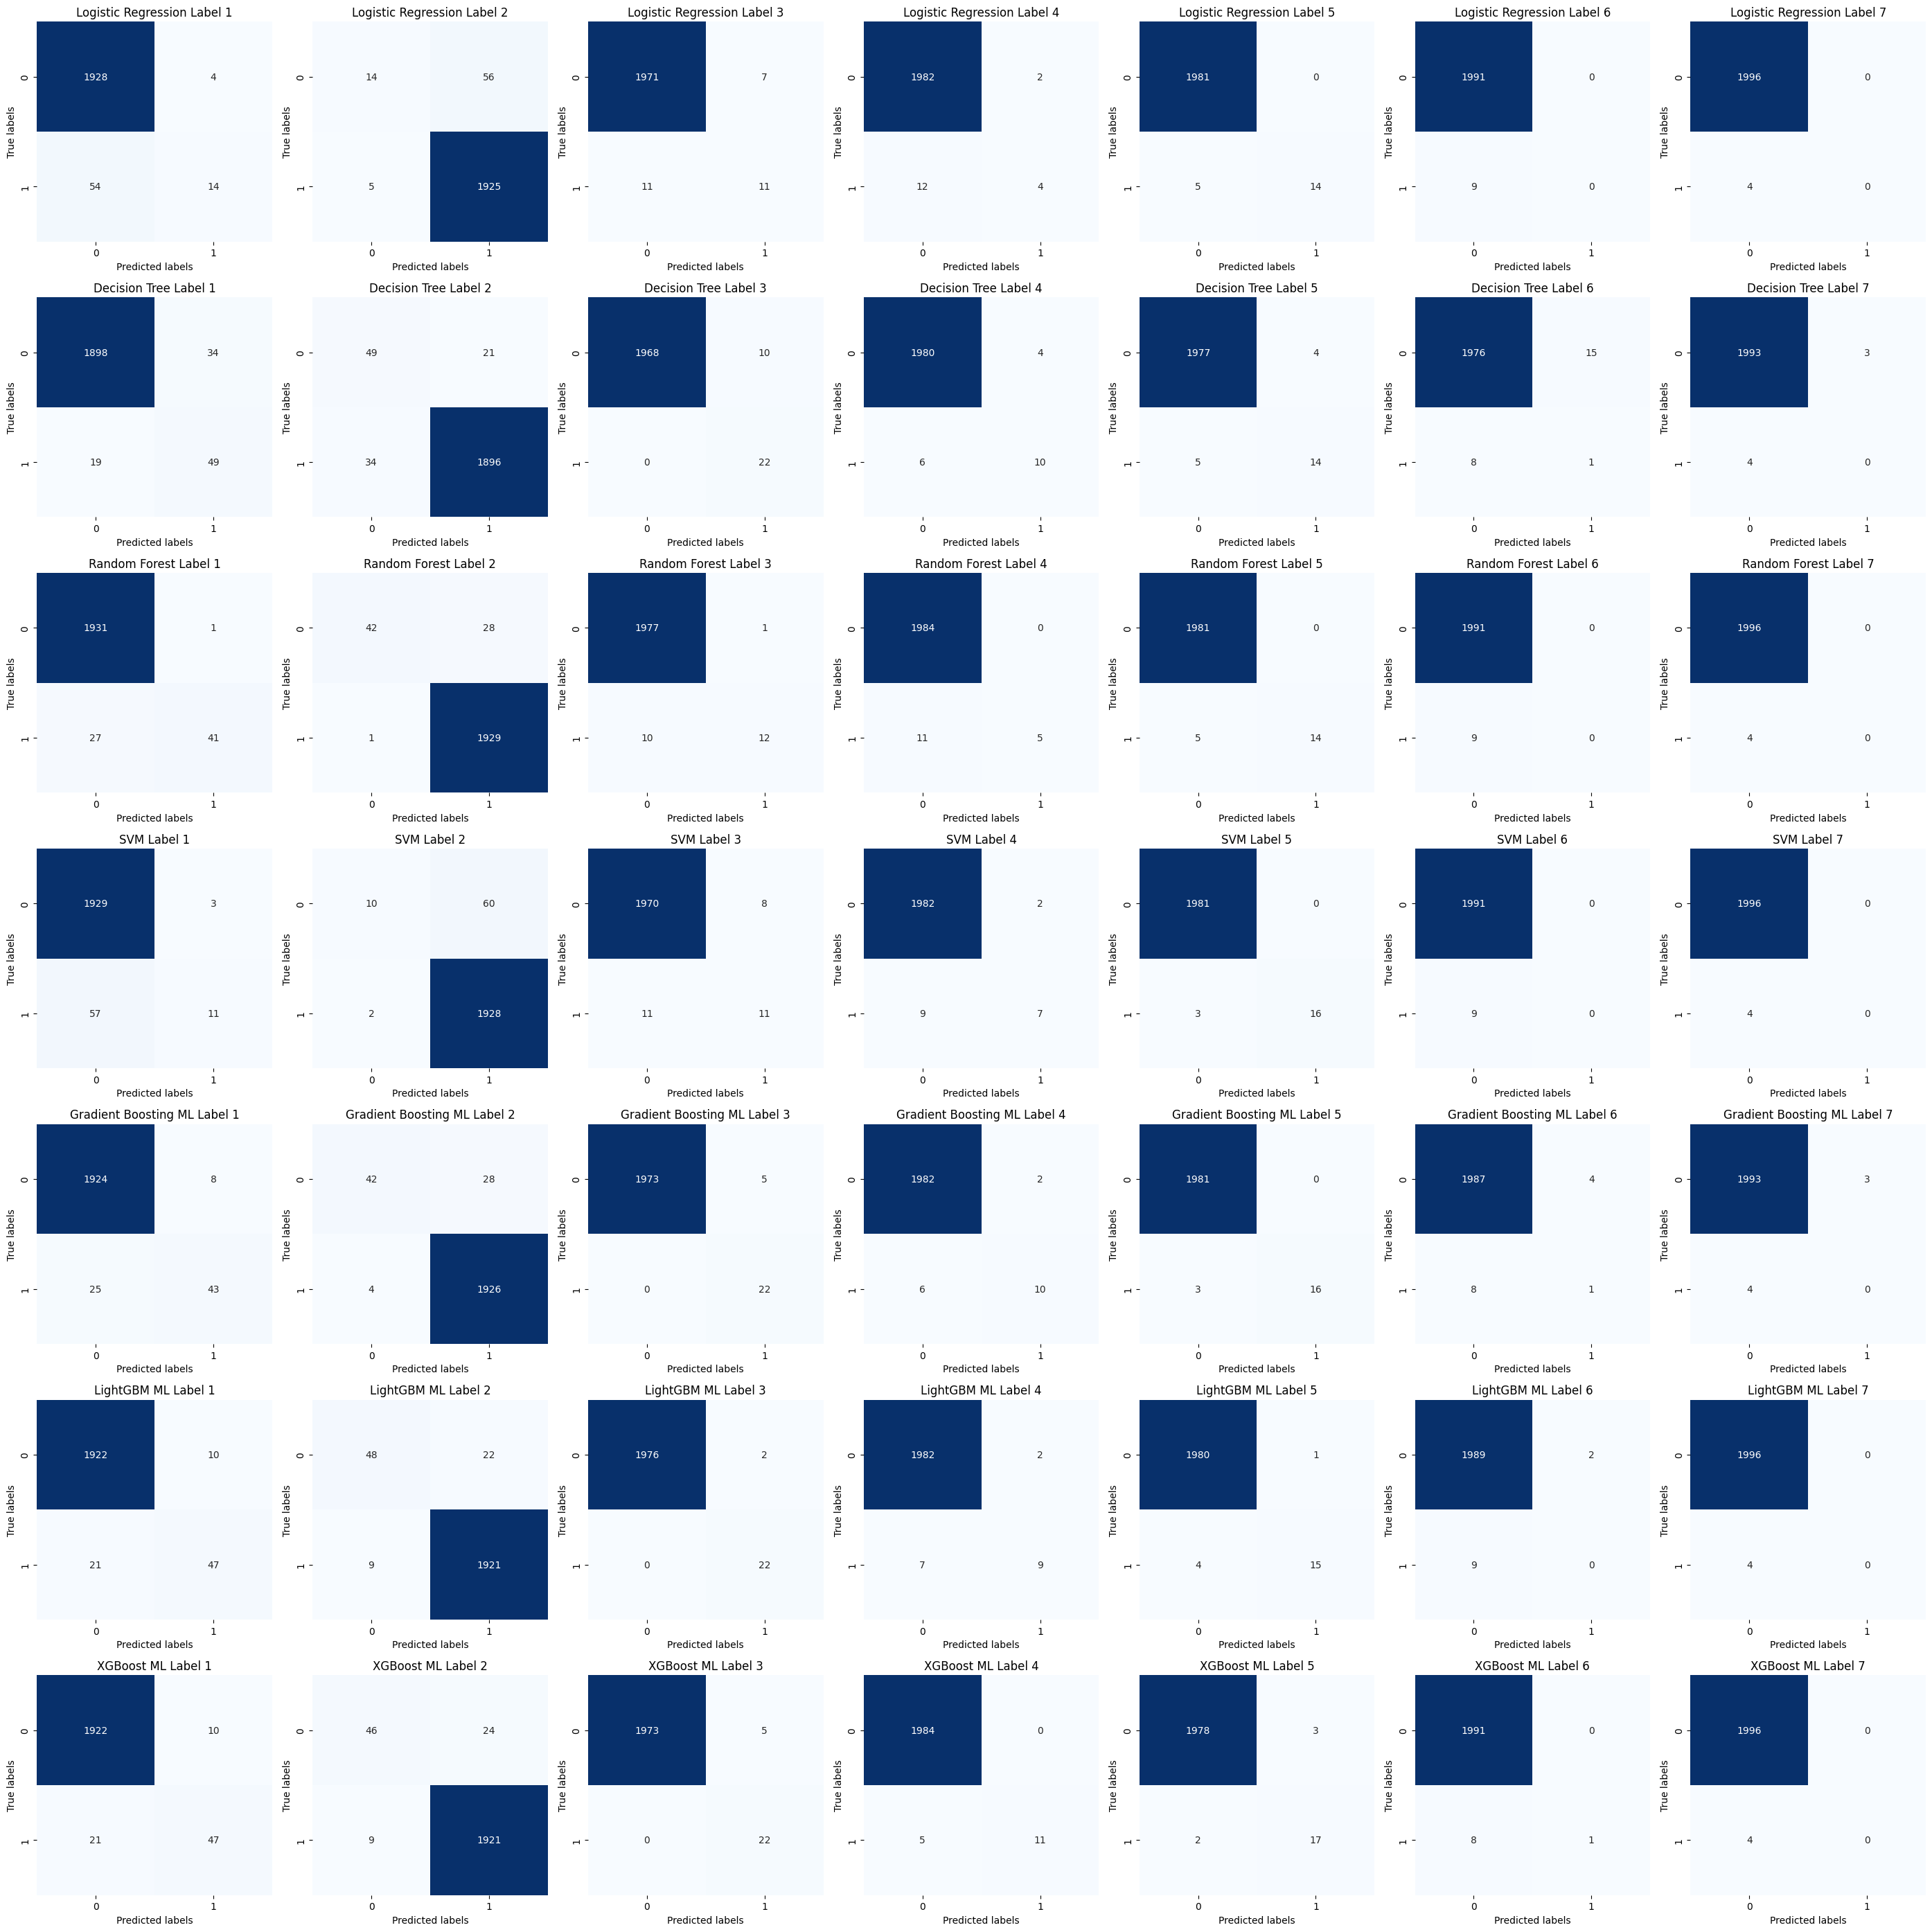

In [79]:
num_models = len(results)
num_labels = results[0]['confusion_matrix'].shape[0]  # Assuming all models have the same number of labels

fig, axes = plt.subplots(nrows=num_models, ncols=num_labels, figsize=(num_labels * 4, num_models * 4))  # Adjust sizing based on number of models and labels

for i, result in enumerate(results):
    for j in range(num_labels):
        ax = axes[i, j] if num_models > 1 else axes[j]
        matrix = result['confusion_matrix'][j]
        
        # Plot the confusion matrix using seaborn
        sns.heatmap(matrix, annot=True, fmt="d", ax=ax, cmap='Blues', cbar=False)
        ax.set_title(f"{result['model_name']} Label {j+1}")
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')

plt.tight_layout()
plt.show()

feature importance function

Using permutation importance for model: OneVsRestClassifier


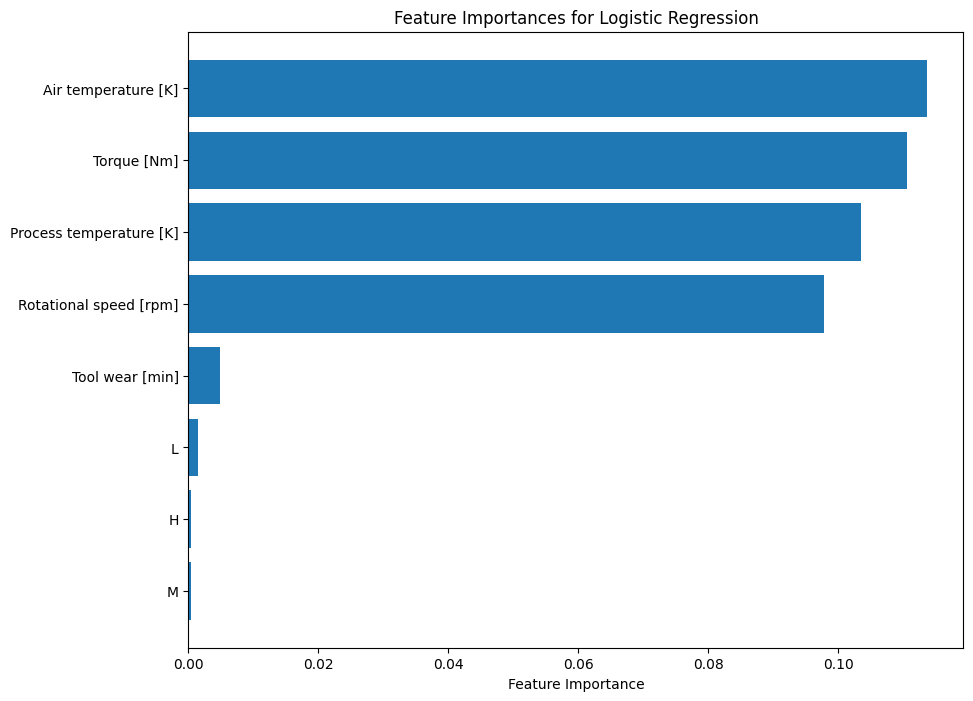

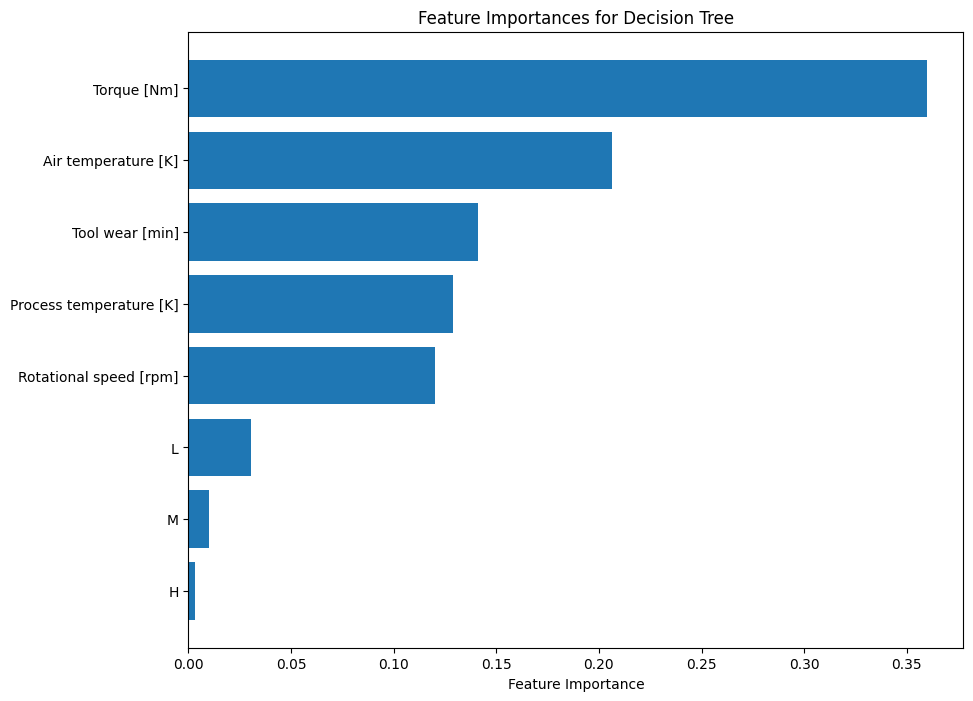

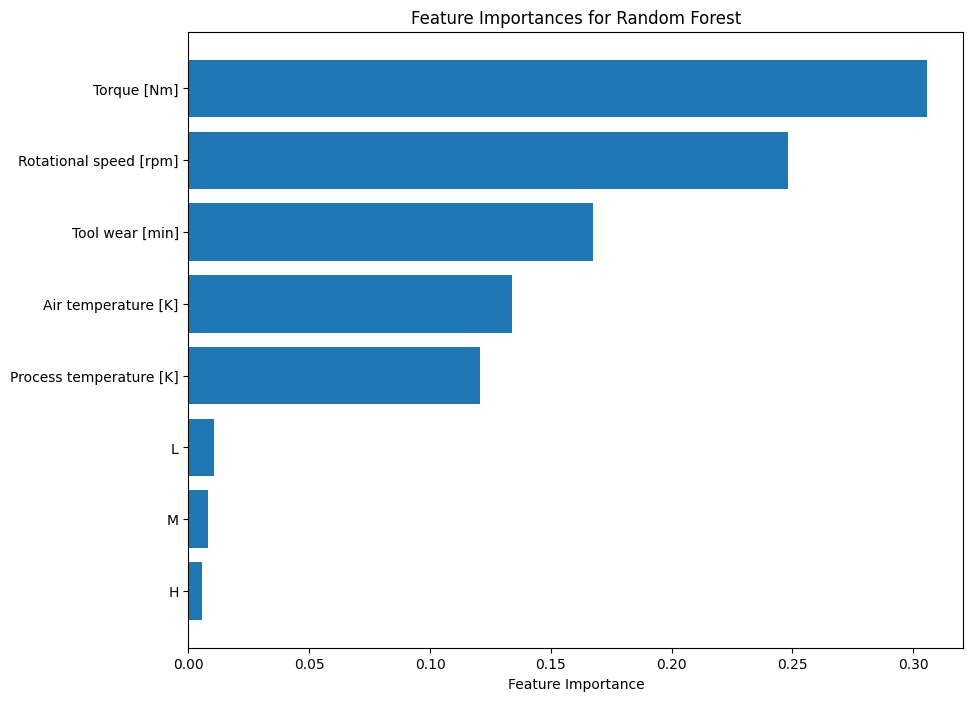

Using permutation importance for model: OneVsRestClassifier


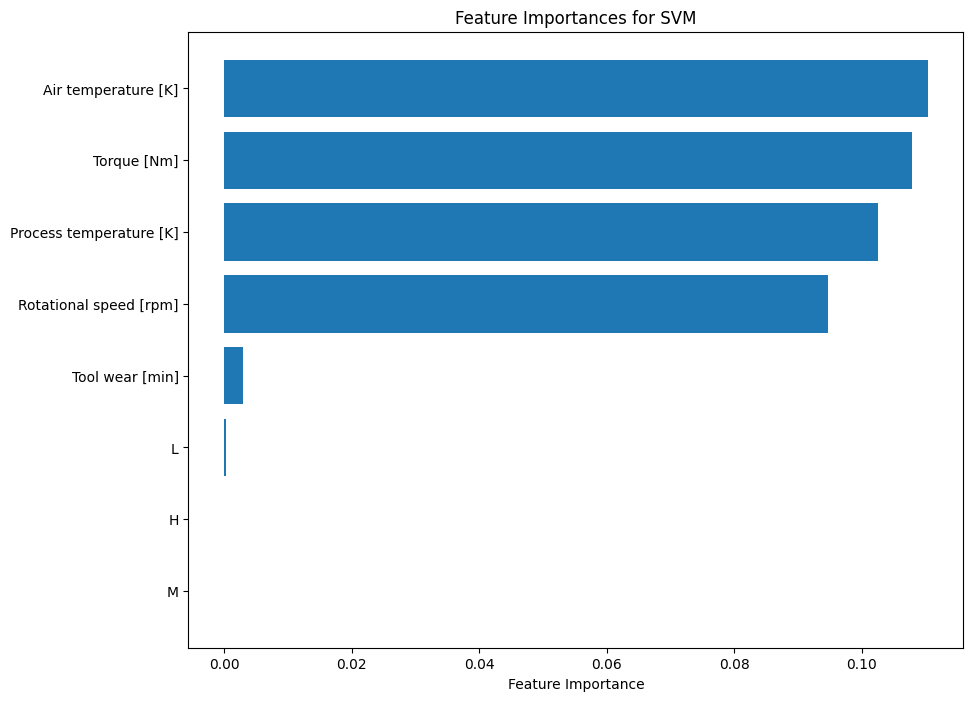

Using permutation importance for model: OneVsRestClassifier


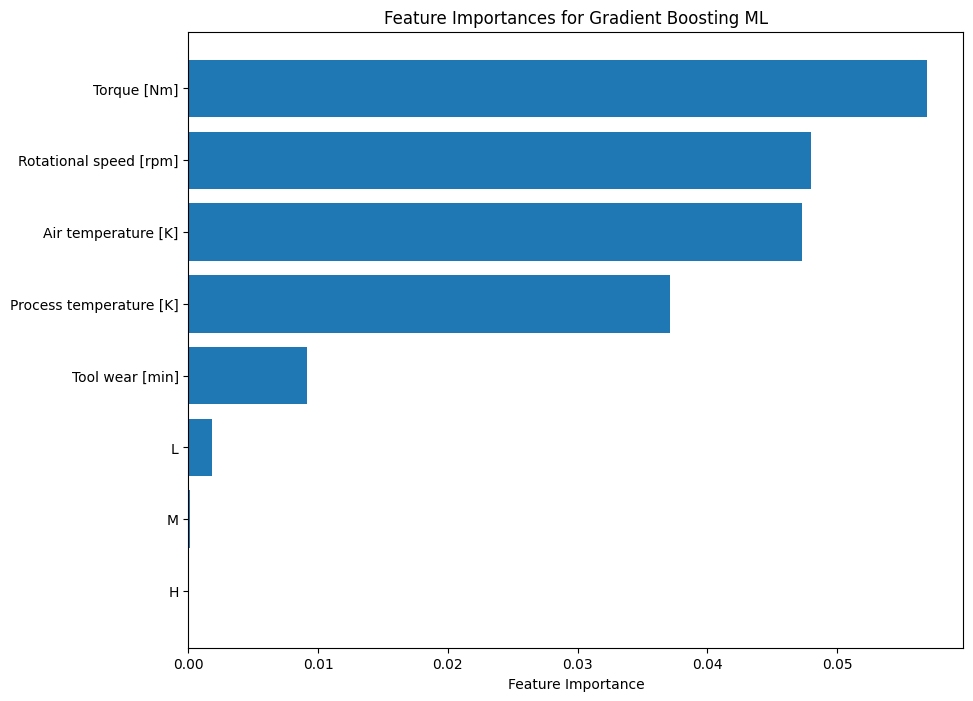

Using permutation importance for model: OneVsRestClassifier


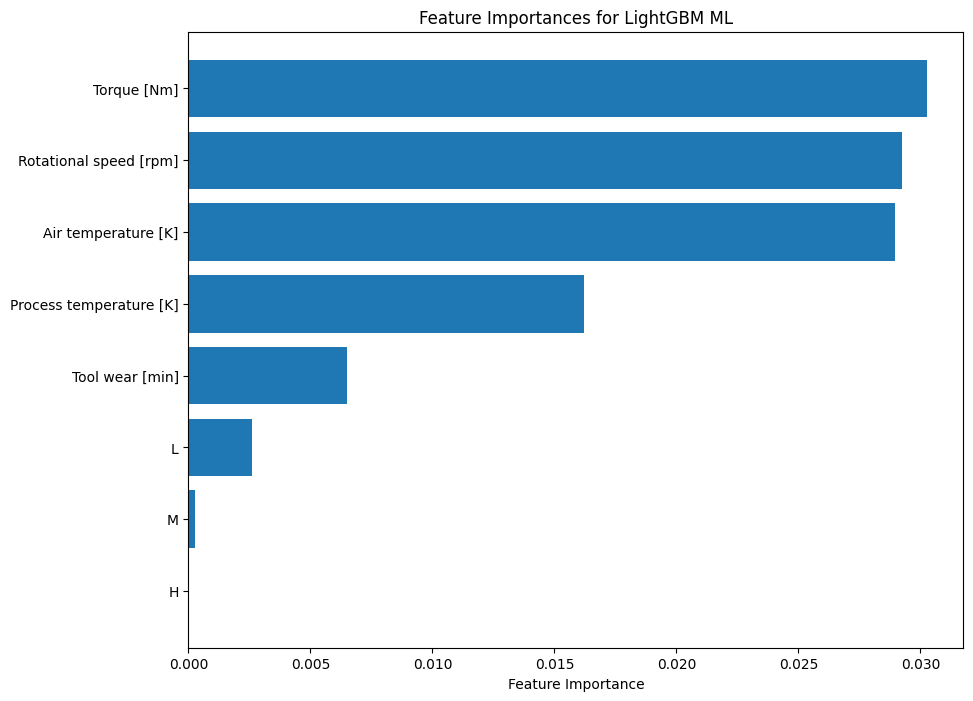

Using permutation importance for model: OneVsRestClassifier


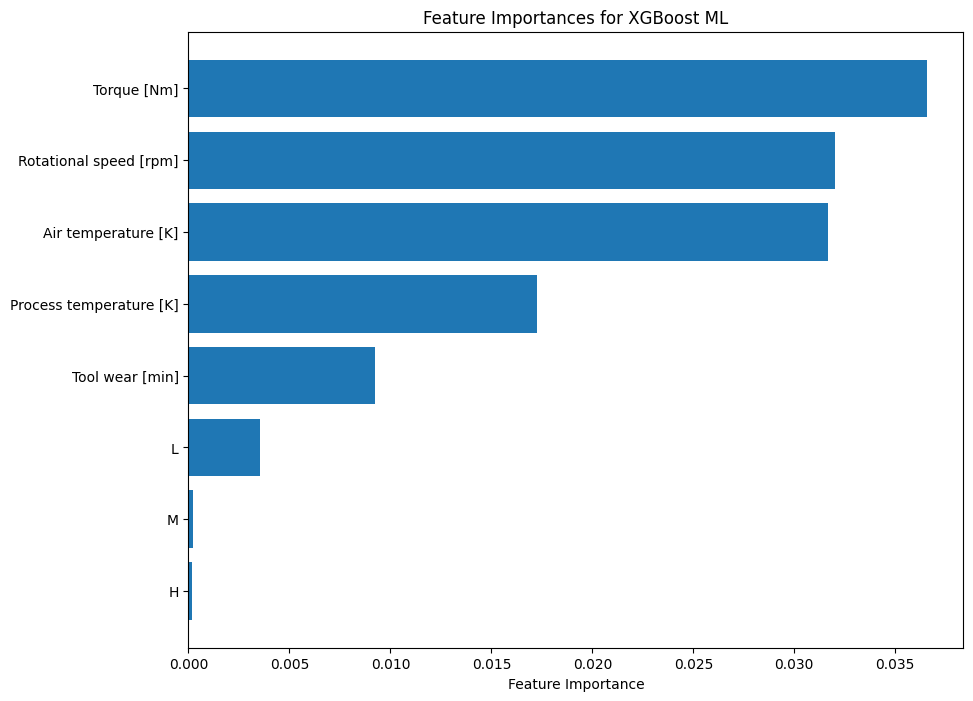

In [87]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from sklearn.inspection import permutation_importance

def get_feature_importance(model, X, y, feature_names):
    """
    Extracts feature importances from a given model if applicable.
    Uses permutation importance as a fallback for models that do not have direct feature importance methods.

    Parameters:
    - model: The trained model.
    - X: Input features (e.g., X_test) used for calculating permutation importance if necessary.
    - y: Target outputs (e.g., y_test) used for calculating permutation importance if necessary.
    - feature_names: List of feature names.

    Returns:
    - A dictionary containing the feature names and their importance scores.
    """
    if hasattr(model, 'feature_importances_'):
        # Handles RandomForest, ExtraTrees, GradientBoosting and Decision Trees
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # Handles Linear models and Linear SVM
        if model.coef_.shape[0] == 1:  # Binary classification
            importances = np.abs(model.coef_[0])
        else:  # Multi-class classification
            importances = np.abs(model.coef_).mean(axis=0)
    else:
        # Use permutation importance as a fallback
        print(f"Using permutation importance for model: {model.__class__.__name__}")
        result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        importances = result.importances_mean  # Average over the repeats for stability

    feature_importance_dict = dict(zip(feature_names, importances))
    return feature_importance_dict

# Example usage with a model and a dataset:
# importance_dict = get_feature_importance(trained_model, X_test, y_test, feature_names)
# plot_feature_importances(importance_dict, "Model Name with Appropriate Importance")


def plot_feature_importances(importance_dict, model_name):
    """
    Plots the feature importances.

    Parameters:
    - importance_dict: Dictionary of features and their importances.
    - model_name: Name of the model.
    """
    # Sort features by importance
    sorted_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
    features, importances = zip(*sorted_features)
    
    plt.figure(figsize=(10, 8))
    plt.barh(features, importances)
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importances for {model_name}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
    plt.show()

# Example Usage:
feature_names = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
                 'Torque [Nm]', 'Tool wear [min]', 'H', 'L', 'M']
models = [log_reg, dec_tree, rand_forest, svm_model, gb_model, lgbm_model, xgb_model]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", 
               "Gradient Boosting ML", "LightGBM ML", "XGBoost ML"]

for model, name in zip(models, model_names):
    try:
        importance_dict = get_feature_importance(model, x_test,y_test,feature_names)
        plot_feature_importances(importance_dict, name)
    except ValueError as e:
        print(f"{name} does not support direct feature importance extraction: {str(e)}")
        # You could consider using a model-agnostic method here if needed.


Hyper parameters tuning

In [98]:

from sklearn.model_selection import GridSearchCV
import numpy as np

# Hyperparameter grids
param_grid_log_reg = {
    'estimator__C': np.logspace(-4, 4, 4),  # Regularization strength
    'estimator__solver': ['liblinear', 'saga']  # Algorithm to use for optimization
}

param_grid_dec_tree = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

param_grid_rand_forest = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

param_grid_svm = {
    'estimator__C': [0.1, 1, 10],  # Regularization parameter
    'estimator__kernel': ['linear', 'rbf']  # Specifies the kernel type to be used in the algorithm
}

param_grid_gb = {
    'estimator__n_estimators': [50, 100, 150],  # Number of boosting stages to perform
    'estimator__learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'estimator__max_depth': [3, 5, 10]  # Maximum depth of the individual regression estimators
}

param_grid_lgbm = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [5, 10, 20]
}

param_grid_xgb = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [5, 10, 20]
}


In [96]:

def perform_grid_search(X_train, y_train, model, param_grid, model_name):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")



In [97]:
perform_grid_search(x_train, y_train, log_reg, param_grid_log_reg, 'Logistic Regression')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Logistic Regression: {'estimator__C': 0.046415888336127774, 'estimator__solver': 'liblinear'}
Best score for Logistic Regression: 0.9648751239178374


In [99]:
# Assuming x_train and y_train are your training data and labels

# Logistic Regression
perform_grid_search(x_train, y_train, log_reg, param_grid_log_reg, 'Logistic Regression')

# Decision Tree
perform_grid_search(x_train, y_train, dec_tree, param_grid_dec_tree, 'Decision Tree')

# Random Forest
perform_grid_search(x_train, y_train, rand_forest, param_grid_rand_forest, 'Random Forest')

# SVM
perform_grid_search(x_train, y_train, svm_model, param_grid_svm, 'SVM')

# Gradient Boosting
perform_grid_search(x_train, y_train, gb_model, param_grid_gb, 'Gradient Boosting')

# LightGBM
perform_grid_search(x_train, y_train, lgbm_model, param_grid_lgbm, 'LightGBM')

# XGBoost
perform_grid_search(x_train, y_train, xgb_model, param_grid_xgb, 'XGBoost')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Logistic Regression: {'estimator__C': 0.046415888336127774, 'estimator__solver': 'liblinear'}
Best score for Logistic Regression: 0.9648751239178374
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Best score for Decision Tree: 0.9787498899471774
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 150}
Best score for Random Forest: 0.9743748741834878
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for SVM: {'estimator__C': 10, 'estimator__kernel': 'rbf'}
Best score for SVM: 0.9661250614490893
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Gradient Boosting: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 3, 'estimator__n_estimators': 150}
Best score

deep learning model using torch (MLP)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

# Data preprocessing
scaler = MinMaxScaler()

# Convert DataFrames to numpy arrays for scaling
x_train_scaled = scaler.fit_transform(x_train.values)
x_test_scaled = scaler.transform(x_test.values)

# Convert numpy arrays to torch tensors
x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
# Assuming x_train, y_train, x_test, y_test are numpy arrays


# Create datasets and dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model
class MLP(nn.Module):
    def __init__(self, num_features, num_labels):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(num_features, 128)
        self.layer2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, num_labels)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

# Initialize the model
model = MLP(x_train_tensor.shape[1], y_train_tensor.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, epochs=1):
    model.train()
    start_time = time.time()  # Start time for training

    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()  # Clear gradients for the next train
            outputs = model(inputs)  # the forward process
            loss = criterion(outputs, labels)  # calculate loss
            loss.backward()  # the backward process (gradients calculation)
            optimizer.step()  # update parameters

    end_time = time.time()  # End time for training
    train_time = end_time - start_time  # Calculate training time
    print(f"Training Time: {train_time:.4f} seconds")

# Example usage
train_model(model, train_loader, criterion, optimizer, epochs=10)

# To evaluate the model, implement similar logic here using test_loader


Training Time: 6.0604 seconds


In [ ]:
import time
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model2(model, loader, criterion):
    model.eval()  # Set the model to evaluation mode
    start_time = time.time()  # Start time for evaluation
    
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        losses = []
        all_preds = []
        all_labels = []
        for inputs, labels in loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            losses.append(loss.item())
            predicted_probs = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
            predicted_labels = (predicted_probs > 0.5).float()  # Threshold predictions
            all_preds.extend(predicted_labels.tolist())
            all_labels.extend(labels.tolist())

        # Calculate average loss over all batches
        avg_loss = sum(losses) / len(losses)
        # Calculate metrics
        accuracy = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds, average='macro')
        recall = recall_score(all_labels, all_preds, average='macro')
        f1 = f1_score(all_labels, all_preds, average='macro')

    end_time = time.time()  # End time for evaluation
    eval_time = end_time - start_time  # Calculate evaluation time

    # Print results including timing
    print(f"Loss: {avg_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Evaluation Time: {eval_time:.4f} seconds")

# When you call evaluate_model2, it now also reports the time it took to evaluate:
evaluate_model2(model, test_loader, criterion)


Loss: 0.0445
Accuracy: 0.9640
Precision: 0.3604
Recall: 0.2041
F1 Score: 0.2371
Evaluation Time: 0.1160 seconds
